TODO
1) Encode text data using get_dummies (columns = [sex, smoker, region]).
2) Handle outliers (Not to skew the results)
3) Save Cleaned Data as New CSV

In [ ]:
import pandas as pd
csv_path = '../../data/insurance.csv'
df = pd.read_csv(csv_path)

In [2]:
#1 Encode Data
df = pd.get_dummies(df, columns=['sex', 'smoker','region'], drop_first=True)

In [3]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [4]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

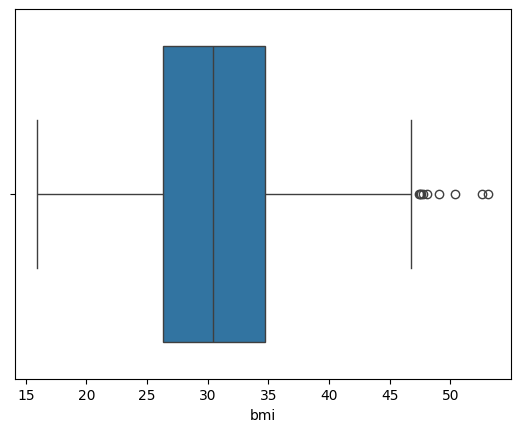

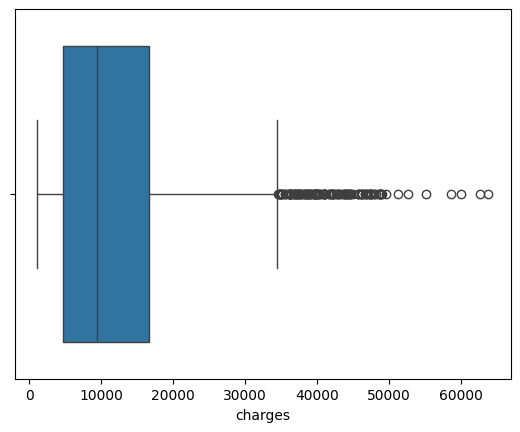

In [6]:
sns.boxplot(x=df['bmi'])
plt.show()

sns.boxplot(x=df['charges'])
plt.show()

In [7]:
import numpy as np

In [8]:
#Using IQR method

#BMI
bmi_q1 = df['bmi'].quantile(0.25)
bmi_q3 = df['bmi'].quantile(0.75)
IQR = bmi_q3 - bmi_q1
bmi_lower = bmi_q1 - 1.5 * IQR
bmi_upper = bmi_q3 + 1.5 * IQR

#Charges
charges_q1 = df['charges'].quantile(0.25)
charges_q3 = df['charges'].quantile(0.75)
IQR = charges_q3 - charges_q1
charges_lower = charges_q1 - 1.5 * IQR
charges_upper = charges_q3 + 1.5 * IQR

In [9]:
#Removing extreme outliers
df = df[(df['bmi'] <= bmi_upper) & (df['bmi'] >= bmi_lower) ]
df = df[(df['charges'] <= charges_upper) & (df['charges'] >= charges_lower)]

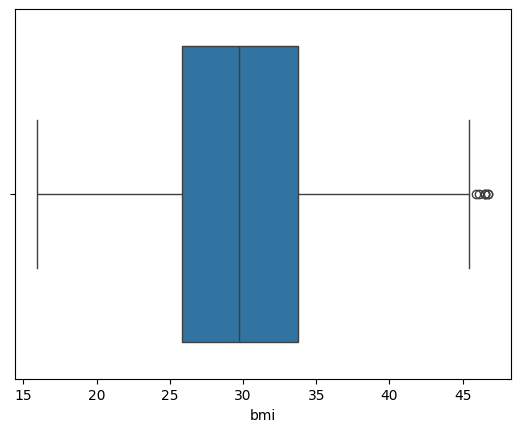

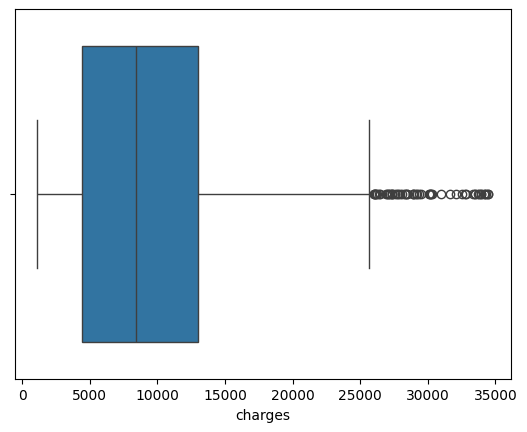

In [10]:
sns.boxplot(x=df['bmi'])
plt.show()

sns.boxplot(x=df['charges'])
plt.show()

✅Automatically removes extreme values based on the data distribution

Export the Dataframe to CSV

In [12]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [13]:
df.to_csv('../data/clean_insurance.csv', index=False)